# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Create a DataFrame from the list of cities
cities_df = pd.DataFrame(cities, columns=["City"])

# Print the DataFrame
print("\nList of Cities:")
print(cities_df)


List of Cities:
                  City
0    port-aux-francais
1            grytviken
2    wailua homesteads
3           fuvahmulah
4                 roma
..                 ...
575            wasilla
576       toga village
577       wladyslawowo
578           lalibela
579             ambert

[580 rows x 1 columns]


In [4]:
weather_api_key

'00c2b88b6505e9bd30f323e306961a60'

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url)

city_weather = response.json()
city_weather

{'cod': '400', 'message': 'Nothing to geocode'}

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_url = f"{url}q={city}&appid={weather_api_key}&units=metric" 

response = requests.get(city_url)
city_weather = response.json()

response


<Response [200]>

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric" 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | humberto de campos
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | flin flon
Processing Record 13 of Set 1 | chake chake
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | hua hin
Processing Record 19 of Set 1 | al hawatah
Processing Record 20 of Set 1 | kitee
Processing Record 21 of Set 1 | santa cruz
Processing Record 22 o

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.42,76,100,8.13,TF,1730517895
1,grytviken,-54.2811,-36.5092,1.88,59,18,3.10,GS,1730517896
2,wailua homesteads,22.0669,-159.3780,25.44,79,75,7.72,US,1730517897
3,roma,43.2128,-75.4557,8.71,91,100,6.17,US,1730517900
4,blackmans bay,-43.0167,147.3167,21.52,36,100,1.79,AU,1730517901


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.42,76,100,8.13,TF,1730517895
1,grytviken,-54.2811,-36.5092,1.88,59,18,3.10,GS,1730517896
2,wailua homesteads,22.0669,-159.3780,25.44,79,75,7.72,US,1730517897
3,roma,43.2128,-75.4557,8.71,91,100,6.17,US,1730517900
4,blackmans bay,-43.0167,147.3167,21.52,36,100,1.79,AU,1730517901


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

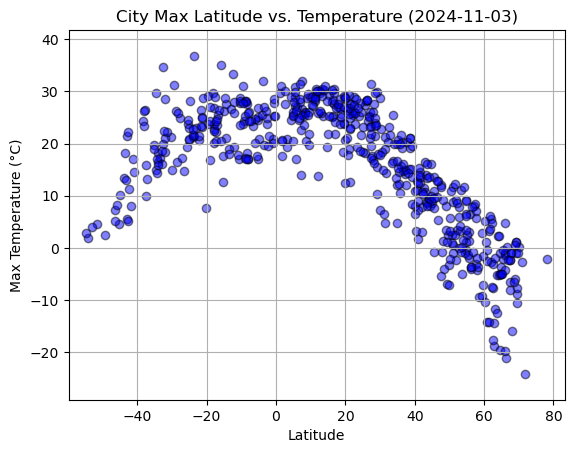

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-11-03)', )
plt.xlabel('Latitude', )
plt.ylabel('Max Temperature (°C)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Max Temp'].min() - 5, city_data_df['Max Temp'].max() + 5)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

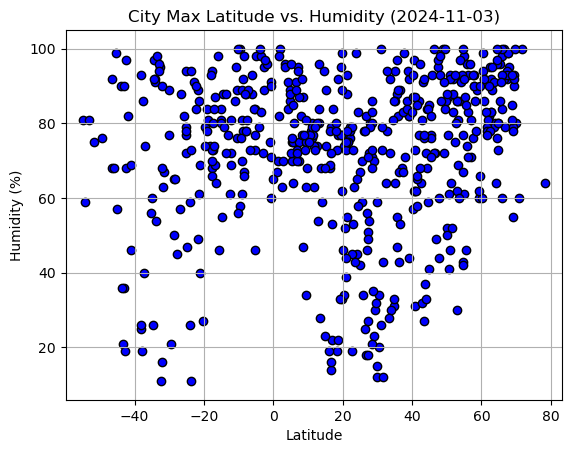

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-11-03)', )
plt.xlabel('Latitude', )
plt.ylabel('Humidity (%)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Humidity'].min() - 5, city_data_df['Humidity'].max() + 5)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

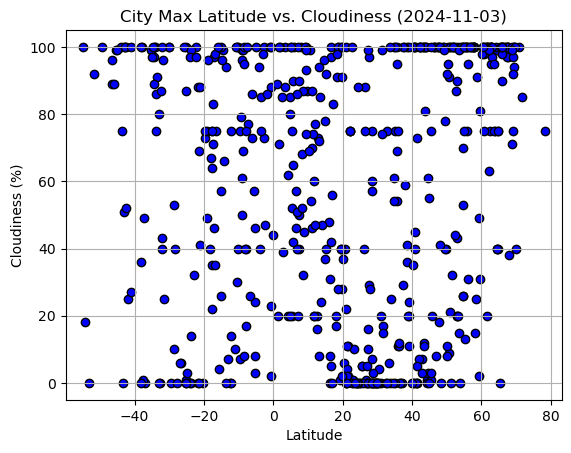

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2024-11-03)', )
plt.xlabel('Latitude', )
plt.ylabel('Cloudiness (%)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Cloudiness'].min() - 5, city_data_df['Cloudiness'].max() + 5)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

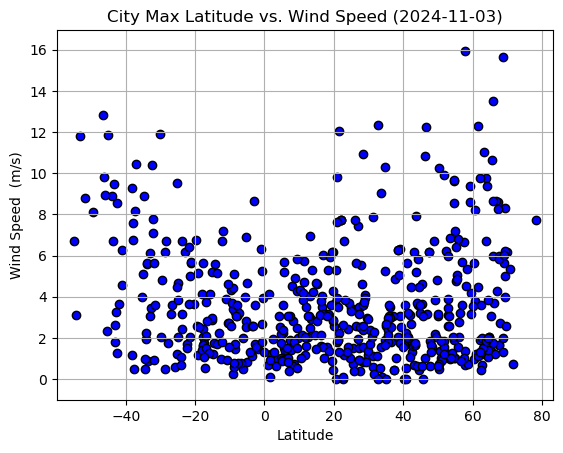

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2024-11-03)', )
plt.xlabel('Latitude', )
plt.ylabel('Wind Speed  (m/s)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Wind Speed'].min() - 1, city_data_df['Wind Speed'].max() + 1)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(data, x_column, y_column):
    # Extract the independent (X) and dependent (y) variables
    X = data[x_column]
    y = data[y_column]
    x_center = (X.min() + X.max()) / 2
    y_center = (y.min() + y.max()) / 2

    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

    # Calculate predicted values based on the linear regression
    y_pred = intercept + slope * X

     # Plot the regression line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot of the data
    plt.scatter(X, y, color='blue', label='Data Points', alpha=0.5)
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

    # Labeling the plot
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.annotate(line_eq,(x_center, y_center),fontsize=15,color="red")

    # Show the plot
    print(f"The r^2-value is: {r_value**2}")
    plt.show()


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,wailua homesteads,22.0669,-159.3780,25.44,79,75,7.72,US,1730517897
3,roma,43.2128,-75.4557,8.71,91,100,6.17,US,1730517900
6,tiksi,71.6872,128.8694,-24.11,100,85,0.72,RU,1730517903
8,isafjordur,66.0755,-23.1240,-0.96,84,90,3.71,IS,1730517906
9,albany,42.6001,-73.9662,11.47,64,100,1.34,US,1730517817


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.42,76,100,8.13,TF,1730517895
1,grytviken,-54.2811,-36.5092,1.88,59,18,3.10,GS,1730517896
4,blackmans bay,-43.0167,147.3167,21.52,36,100,1.79,AU,1730517901
5,mount gambier,-37.8333,140.7667,26.40,19,100,6.75,AU,1730517902
7,humberto de campos,-2.5983,-43.4611,23.84,89,73,1.70,BR,1730517904


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7918187992774744


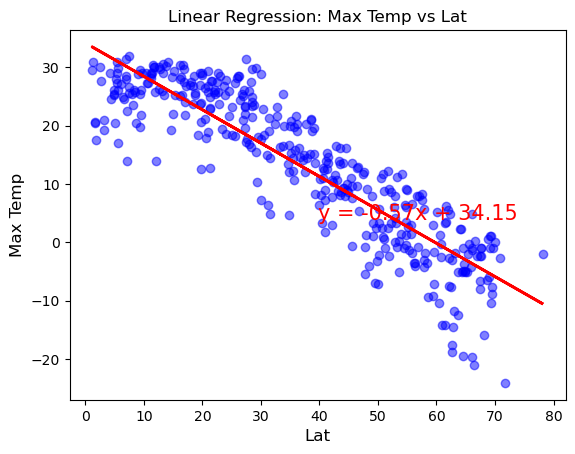

In [61]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r^2-value is: 0.351069146460971


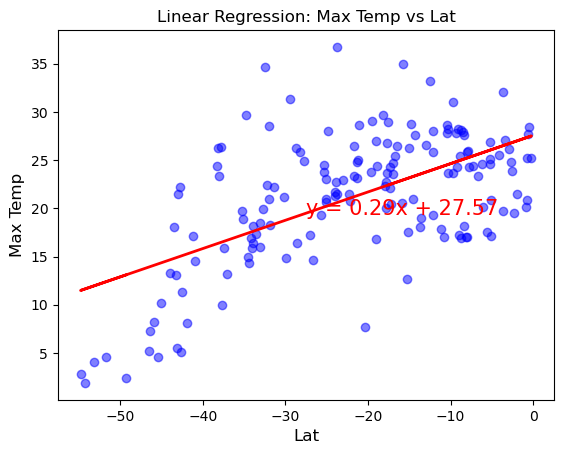

In [62]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.058131062330967785


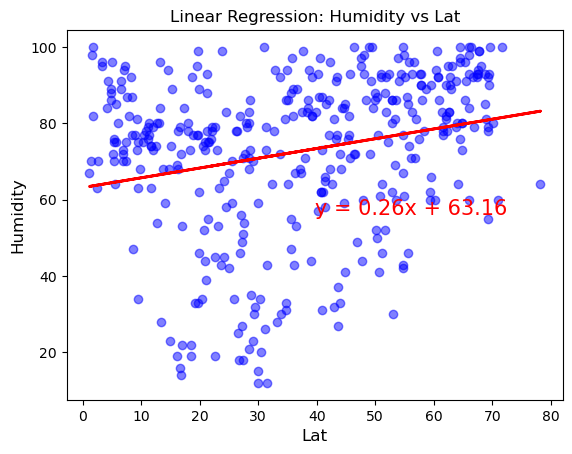

In [49]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

The r^2-value is: 0.07551232104640639


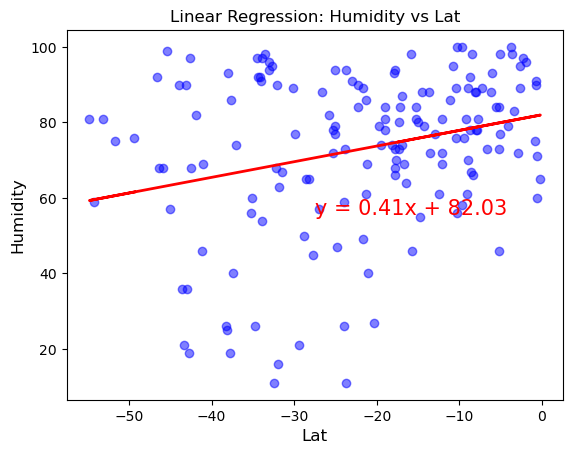

In [50]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06982000514215515


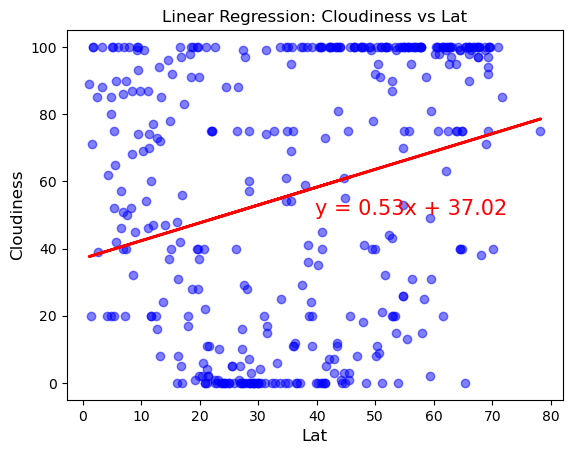

In [52]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r^2-value is: 0.0024123674660412727


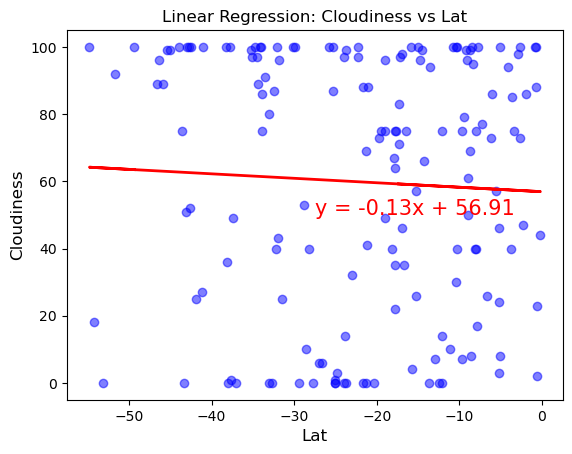

In [53]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.05140322272705988


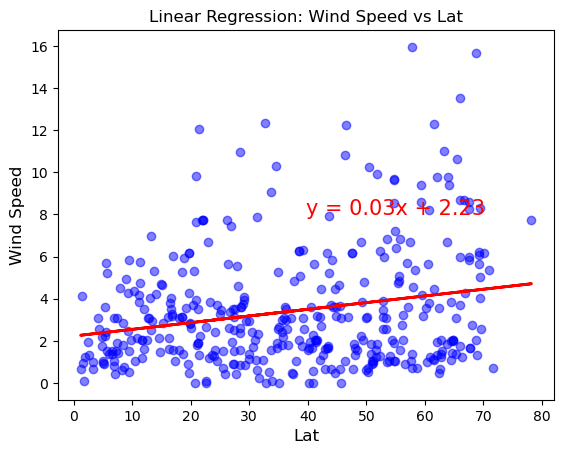

In [54]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r^2-value is: 0.20532096992636173


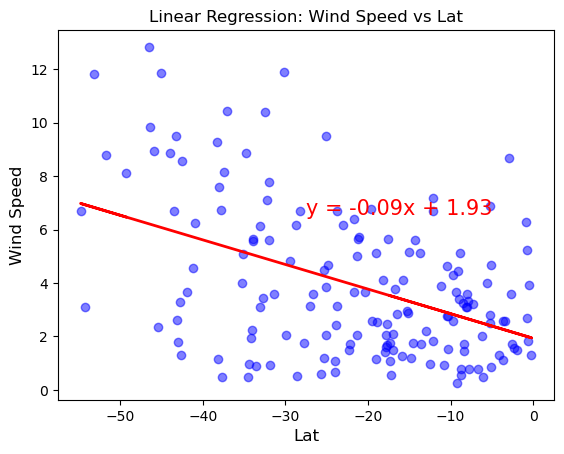

In [55]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE